In [1]:
#Import the required libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

In [2]:
#Import the data
file_path = 'H:\Work\\1M\\'
df_cust = pd.read_csv(file_path + 'olist_customers_dataset.csv')
df_geoloc = pd.read_csv(file_path + 'olist_geolocation_dataset.csv')
df_orders = pd.read_csv(file_path + 'olist_orders_dataset.csv')
df_items = pd.read_csv(file_path + 'olist_order_items_dataset.csv')
df_payments = pd.read_csv(file_path + 'olist_order_payments_dataset.csv')
df_reviews = pd.read_csv(file_path + 'olist_order_reviews_dataset.csv')
df_products = pd.read_csv(file_path + 'olist_products_dataset.csv')
df_sellers = pd.read_csv(file_path + 'olist_sellers_dataset.csv')
translate = pd.read_csv(file_path + 'product_category_name_translation.csv')

## Order_info data

In [3]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [4]:
df_orders.describe().transpose()

,count,unique,top,freq
order_id,99441,99441,e481f51cbdc54678b7cc49136f2d6af7,1
customer_id,99441,99441,9ef432eb6251297304e76186b10a928d,1
order_status,99441,8,delivered,96478
order_purchase_timestamp,99441,98875,2018-04-11 10:48:14,3
order_approved_at,99281,90733,2018-02-27 04:31:10,9
order_delivered_carrier_date,97658,81018,2018-05-09 15:48:00,47
order_delivered_customer_date,96476,95664,2018-05-08 23:38:46,3
order_estimated_delivery_date,99441,459,2017-12-20 00:00:00,522


There are no customer_id which appear more than once, implying that this dataset is random sampling and cannot be used to analyze customer retention.

In [5]:
#Transform date columns to the appropriate type
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])
df_orders['order_approved_at'] = pd.to_datetime(df_orders['order_approved_at'])
df_orders['order_delivered_carrier_date'] = pd.to_datetime(df_orders['order_delivered_carrier_date'])
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'])
df_orders['order_estimated_delivery_date'] = pd.to_datetime(df_orders['order_estimated_delivery_date'])

In [6]:
#Sort the data by purchase_timestamp to find out missing values
df_orders.sort_values(by='order_purchase_timestamp', inplace=True)
df_orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
4541,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaT,2016-10-20
4396,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,NaT,NaT,2016-10-28
10071,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,canceled,2016-09-13 15:24:19,2016-10-07 13:16:46,NaT,NaT,2016-09-30
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04
83078,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02 22:07:52,2016-10-06 15:50:56,NaT,NaT,2016-10-25


In [7]:
#Fill mising delivery dates
df_orders['order_delivered_customer_date'].bfill(inplace=True)
for col in ['order_delivered_customer_date','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date']:
    df_orders[col].fillna(method = 'ffill', inplace = True)


In [8]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
4541,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,2016-11-09 07:47:38,2016-10-20
4396,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,2016-10-18 13:14:51,2016-11-09 07:47:38,2016-10-28
10071,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,canceled,2016-09-13 15:24:19,2016-10-07 13:16:46,2016-10-18 13:14:51,2016-11-09 07:47:38,2016-09-30
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04
83078,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02 22:07:52,2016-10-06 15:50:56,2016-11-07 17:11:53,2016-10-26 14:02:13,2016-10-25


In [9]:
#Check if all values are filled
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 4541 to 60938
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.8+ MB


In [10]:
#Create columns to find out more about the estimated shipping time versus actual shipping time
df_orders['actual_duration'] = df_orders['order_delivered_customer_date'] - df_orders['order_purchase_timestamp']
df_orders['estimated_duration'] = df_orders['order_estimated_delivery_date'] - df_orders['order_purchase_timestamp']

df_orders['actual_duration'] = df_orders['actual_duration'].dt.total_seconds() / 216000
df_orders['estimated_duration'] = df_orders['estimated_duration'].dt.total_seconds() / 216000

df_orders['duration_difference'] = df_orders['actual_duration'] - df_orders['estimated_duration']
df_orders['shipped_on_time'] = df_orders['duration_difference'].apply(lambda x: True if (x) <= 0 else False)

#Create columns to find out more about how the total shipping time is distributed accross different processes
df_orders['payment_duration'] = df_orders['order_approved_at'] - df_orders['order_purchase_timestamp']
df_orders['stock_up_duration'] = df_orders['order_delivered_carrier_date'] - df_orders['order_approved_at']
df_orders['shipping_time'] = df_orders['order_delivered_customer_date'] - df_orders['order_delivered_carrier_date']

df_orders['payment_duration'] = df_orders['payment_duration'].dt.total_seconds() / 216000
df_orders['stock_up_duration'] = df_orders['stock_up_duration'].dt.total_seconds() / 216000
df_orders['shipping_time'] = df_orders['shipping_time'].dt.total_seconds() / 216000

In [11]:
#Create year,month and day columns for easier analysis
df_orders['year_ordered'] = df_orders['order_purchase_timestamp'].dt.year
df_orders['month_ordered'] = df_orders['order_purchase_timestamp'].dt.month
df_orders['day_ordered'] = df_orders['order_purchase_timestamp'].dt.day

#Group with the payment table to find out the GMV over time
df_orders = pd.merge(df_orders, df_payments, how='left', on='order_id')



In [12]:
df_orders.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,actual_duration,estimated_duration,...,payment_duration,stock_up_duration,shipping_time,year_ordered,month_ordered,day_ordered,payment_sequential,payment_type,payment_installments,payment_value
87452,ddbcecddeac25c47d0e7fe54d81640fd,6c6ecb0678cda04c3ff926b0d091cc1a,delivered,2018-06-15 19:16:33,2018-06-15 19:42:21,2018-06-20 13:29:00,2018-06-24 14:56:49,2018-07-11,3.527852,10.078736,...,0.007167,1.896292,1.624394,2018,6,15,1.0,credit_card,1.0,50.35
96021,b8dd3c581f151ae1f4a0b011b0715eca,70e12437a260894a3f038b53d44b01e9,delivered,2018-07-27 11:41:22,2018-07-27 11:55:10,2018-07-30 14:04:00,2018-08-04 11:58:48,2018-08-17,3.204843,8.205176,...,0.003833,1.235787,1.965222,2018,7,27,1.0,credit_card,5.0,175.99
63947,5a909d6376edac123359549cd82341df,399178f4096fc06d8539ca9b877f7c15,delivered,2018-03-06 21:33:52,2018-03-06 22:09:22,2018-03-07 20:22:18,2018-04-06 21:31:58,2018-03-23,12.399472,6.440593,...,0.009861,0.370259,12.019352,2018,3,6,3.0,voucher,1.0,18.96
52235,9a3366571a4caa9709415ea10b9422dc,5e05dbfb2e5b6bada9b84f860d447e70,delivered,2018-01-18 15:18:47,2018-01-18 15:36:24,2018-01-23 13:08:56,2018-01-26 20:17:05,2018-02-19,3.282861,12.544782,...,0.004894,1.959037,1.318931,2018,1,18,1.0,credit_card,1.0,52.69
71636,eda1d5c35a11575cffaa3e0fa9d0cd5e,6d5507a06e103b9ea6eeab8fbce6247d,delivered,2018-04-08 13:05:27,2018-04-08 13:30:20,2018-04-09 19:47:51,2018-04-17 11:34:24,2018-04-27,3.574708,7.381819,...,0.006912,0.504866,3.062931,2018,4,8,1.0,credit_card,2.0,125.38


Text(0.5, 1.0, 'GMV over time')

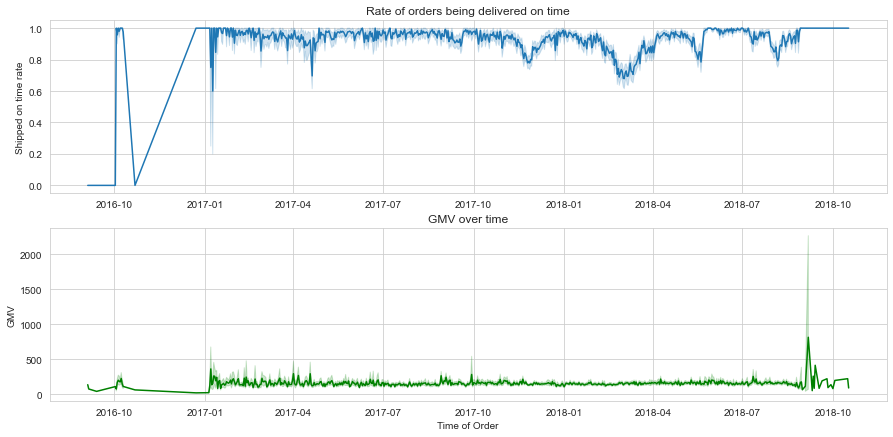

In [13]:
sns.set_style('whitegrid')
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,7))
sns.lineplot(data=df_orders, x=df_orders['order_purchase_timestamp'].dt.date ,y='shipped_on_time', ax=ax1)
ax1.set_ylabel('Shipped on time rate')
ax1.set_xlabel('')
ax1.set_title('Rate of orders being delivered on time')

sns.lineplot(data=df_orders, x=df_orders['order_purchase_timestamp'].dt.date , y='payment_value', ax=ax2, color='g')
ax2.set_ylabel('GMV')
ax2.set_xlabel('Time of Order')
ax2.set_title('GMV over time')

Seems like the data from 2016 and after August 2018 is not reliable, I will cut them out to increase the accuracy of our analysis


In [14]:
df_orders_filtered = df_orders[(df_orders['order_purchase_timestamp'] >= '2017-01-01') & (df_orders['order_purchase_timestamp'] <= '2018-08-31')]

Text(0.5, 1.0, 'GMV over time')

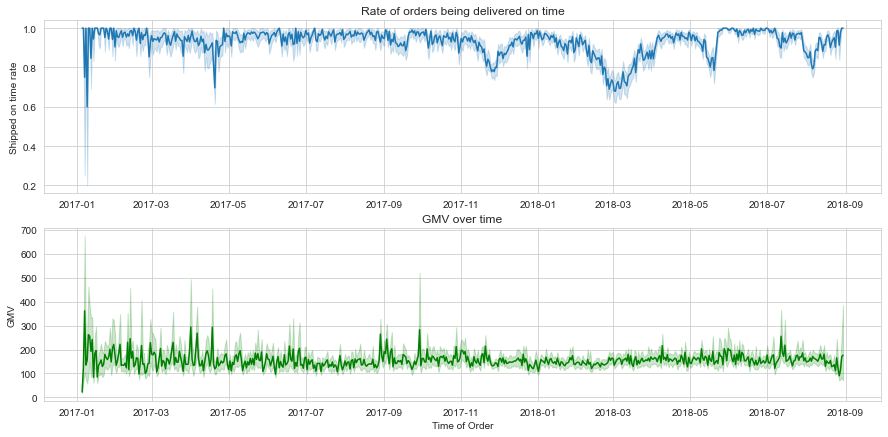

In [15]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,7))
sns.lineplot(data=df_orders, x=df_orders_filtered['order_purchase_timestamp'].dt.date, y='shipped_on_time', ax=ax1)
ax1.set_ylabel('Shipped on time rate')
ax1.set_xlabel('')
ax1.set_title('Rate of orders being delivered on time')

sns.lineplot(data=df_orders, x=df_orders_filtered['order_purchase_timestamp'].dt.date, y='payment_value', ax=ax2, color='g')
ax2.set_ylabel('GMV')
ax2.set_xlabel('Time of Order')
ax2.set_title('GMV over time')

## Item data

In [16]:
df_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [17]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [18]:
df_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [19]:
#Check how the items table is designed
print(df_items.duplicated().sum())
print(df_items[['order_id', 'product_id']].duplicated().sum())


0
10225


Seems like multiple instances of the same product in an order are broken down into different rows rather than having a quantity column. This might cause problems if the freight value for each product/order is counted more than once unintentionally.

In [20]:
# Assuming the freight value represent the total shipping cost for every product of the same type in each order
df_items_grouped = df_items.groupby(by = ['product_id','order_id'], as_index=False).agg({
        'order_item_id': 'count', 
        'seller_id': 'first',
        'shipping_limit_date': 'first',
        'price': 'first',
        'freight_value': 'first'
        })
df_items_grouped.rename(columns={'order_item_id':'quantity'}, inplace=True)
df_items_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102425 entries, 0 to 102424
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   product_id           102425 non-null  object 
 1   order_id             102425 non-null  object 
 2   quantity             102425 non-null  int64  
 3   seller_id            102425 non-null  object 
 4   shipping_limit_date  102425 non-null  object 
 5   price                102425 non-null  float64
 6   freight_value        102425 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.5+ MB


3401


(array([30008., 20056., 11684.,  6826.,  4679.,  3133.,  2196.,  1364.,
          825.]),
 array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 9 artists>)

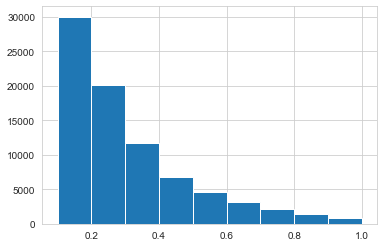

In [21]:
#The percentage of product value that customers are willing to pay as shipping fee using the grouped table
df_items_grouped['freight_rate'] = df_items_grouped['freight_value'] / (df_items_grouped['price'] * df_items_grouped['quantity'])
print(len(df_items_grouped[df_items_grouped['freight_value'] > df_items_grouped['price']]))
plt.hist(x=df_items_grouped['freight_rate'], bins=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

4124


(array([31325., 22616., 13895.,  8363.,  5619.,  3715.,  2712.,  1728.,
         1046.]),
 array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 9 artists>)

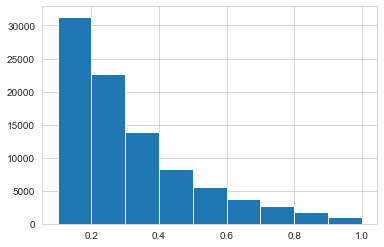

In [22]:
#The percentage of product value that customers are willing to pay as shipping fee using the original table
print(len(df_items[df_items['freight_value'] > df_items['price']]))
df_items['freight_rate'] = df_items['freight_value'] / df_items['price']
plt.hist(x=df_items['freight_rate'], bins=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

In [23]:
print(df_items_grouped['quantity'].mean())

1.0998291432755676


As the average product quantity sold for each order is ~1.1, the shipping cost percentage distributions look similar across the 2 tables. Regardless, there are ~700 less instances where the shipping cost is larger than the product price itself in the grouped table, so I'll assume the grouped table reflects the actual data more accurately.

## Product Category

In [24]:
# Translate the product category name to English
df_products = pd.merge(df_products, translate, on='product_category_name', how='left')
df_products.drop(columns='product_category_name', inplace=True)
df_products.rename(columns={'product_category_name_english':'product_category_name'}, inplace=True)

In [25]:
df_items_grouped2 = pd.merge(df_items_grouped, df_products, on='product_id', how='left')
df_items_grouped2.head()

,product_id,order_id,quantity,seller_id,shipping_limit_date,price,freight_value,freight_rate,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
0,00066f42aeeb9f3007548bb9d3f33c38,f30149f4a8882a08895b6a242aa0d612,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-05-24 18:58:59,101.65,18.59,0.182882,53.0,596.0,6.0,300.0,20.0,16.0,16.0,perfumery
1,00088930e925c41fd95ebfe695fd2655,f5eda0ded77c1293b04c953138c8331d,1,7142540dd4c91e2237acb7e911c4eba2,2017-12-18 19:32:19,129.90,13.93,0.107236,56.0,752.0,4.0,1225.0,55.0,10.0,26.0,auto
2,0009406fd7479715e4bef61dd91f2462,0bf736fd0fd5169d60de3699fcbcf986,1,4a3ca9315b744ce9f8e9374361493884,2017-12-29 16:12:36,229.00,13.10,0.057205,50.0,266.0,2.0,300.0,45.0,15.0,35.0,bed_bath_table
3,000b8f95fcb9e0096488278317764d19,3aba44d8e554ab4bb8c09f6f78032ca8,1,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-16 13:35:21,58.90,19.60,0.332767,25.0,364.0,3.0,550.0,19.0,24.0,12.0,housewares
4,000b8f95fcb9e0096488278317764d19,6f0dfb5b5398b271cc6bbd9ee263530e,1,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-07 22:15:19,58.90,19.60,0.332767,25.0,364.0,3.0,550.0,19.0,24.0,12.0,housewares


<AxesSubplot:xlabel='Product category', ylabel='Units sold'>

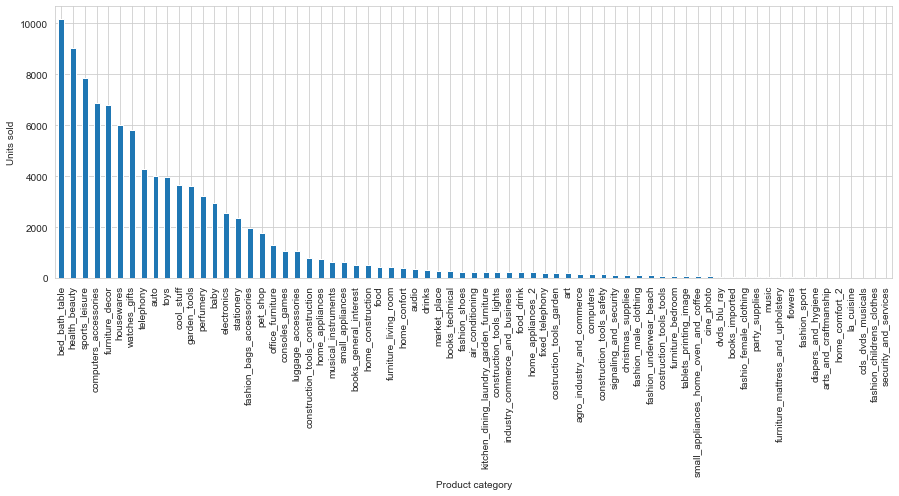

In [26]:
#Categories ranking by products sold
plt.xlabel('Product category')
plt.ylabel('Units sold')
df_items_grouped2['product_category_name'].value_counts().plot(kind = "bar", figsize = (15, 5))

In [27]:
#Top 10 categories sold by quantity
df_items_grouped2['product_category_name'].value_counts().head(10)


bed_bath_table           10160
health_beauty             9022
sports_leisure            7858
computers_accessories     6887
furniture_decor           6781
housewares                6019
watches_gifts             5799
telephony                 4287
auto                      3991
toys                      3979
Name: product_category_name, dtype: int64

In [28]:
#Top 10 categories sold by product value
df_items_grouped2.groupby('product_category_name').agg({'price':'sum'}).sort_values(by='price', ascending=False).head(10)

,price
product_category_name,
health_beauty,1212149.92
watches_gifts,1187533.96
bed_bath_table,963519.89
sports_leisure,929271.47
computers_accessories,806515.13
furniture_decor,633043.92
cool_stuff,621631.74
housewares,573847.89
auto,563780.16


## Item Reviews

In [29]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [30]:
df_reviews.describe()

,review_score
count,100000.000000
mean,4.070890
std,1.359663
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [31]:
df_items_grouped2.to_csv('H:\Work\\1M\\olist_order_items_dataset_grouped.csv')
df_orders.to_csv('H:\Work\\1M\\olist_orders_dataset_filtered.csv')